<a href="https://colab.research.google.com/github/kruthi03/wind-speed/blob/Stats%26ML/100001319_Kruthika_P_Day_3_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question :
Dataset: Use the Iris dataset from Day 3 or a sampled subset.


1. T-Test:
		1. Compare the mean petal lengths of two species (e.g., Setosa vs. Versicolor).
		2. Null Hypothesis: Means are equal.
		3. Use an independent t-test.
2. Z-Test:
		1. Test if the mean sepal length of one species equals a specific value (e.g., 5.0).
		2. Null Hypothesis: Mean equals 5.0.
		3. Perform only if population standard deviation is known or n>30n > 30n>30.
3. ANOVA:
		1. Compare mean petal widths across all three species.
		2. Null Hypothesis: All means are equal.
4. Correlation/Regression:
		1. Explore the relationship between sepal length and petal length.

Step 1: Loaded the data set and overviewed the data

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np


iris = sns.load_dataset('iris')

print("First few rows of the dataset:")
print(iris.head())


First few rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Step 2: perfomed the T-Test :

 Compared the mean of the petal lengths of Setosa and Versicolor

    Null Hypothesis (H₀): The mean petal lengths of the two species are equal.
    Alternative Hypothesis (H₁): The mean petal lengths of the two species are not equal.
    Use an independent t-test.

In [ ]:
from scipy.stats import ttest_ind

setosa_petal_length = iris[iris['species'] == 'setosa']['petal_length']
versicolor_petal_length = iris[iris['species'] == 'versicolor']['petal_length']

t_stat, p_value = ttest_ind(setosa_petal_length, versicolor_petal_length)

print(f"T-Test Results:")
print(f"T-Statistic: {t_stat:.3f}")
print(f"P-Value: {p_value:.3f}")

if p_value < 0.05:
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in means.")


T-Test Results:
T-Statistic: -39.493
P-Value: 0.000
Reject the null hypothesis: The means are significantly different.


Step 3: Z-Test

    Did a test to understand if the mean sample length of the species Cosa is equal to the value of 5.0
    Null Hypothesis (H₀): The mean sepal length of Setosa equals 5.0.
    Alternative Hypothesis (H₁): The mean sepal length of Setosa does not equal 5.

    

In [ ]:
from statsmodels.stats.weightstats import ztest

#setosa_sepal_length = iris[iris['species'] == 'setosa']['sepal_length']
setosa_sepal_length = iris[iris['species'] == 'setosa']['sepal_length']

z_stat, p_value = ztest(setosa_sepal_length, value=5.0)

print(f"Z-Test Results:")
print(f"Z-Statistic: {z_stat:.3f}")
print(f"P-Value: {p_value:.3f}")

if p_value < 0.05:
    print("Reject the null hypothesis: The mean sepal length is significantly different from 5.0.")
else:
    print("Fail to reject the null hypothesis: The mean sepal length is not significantly different from 5.0.")


Z-Test Results:
Z-Statistic: 0.120
P-Value: 0.904
Fail to reject the null hypothesis: The mean sepal length is not significantly different from 5.0.


Step 4: ANOVA

Compared mean petal widths across all three species.

    Null Hypothesis (H₀): The mean petal widths of all three species are equal.
    Alternative Hypothesis (H₁): At least one species has a different mean petal width.

In [ ]:
from scipy.stats import f_oneway

setosa_petal_width = iris[iris['species'] == 'setosa']['petal_width']
versicolor_petal_width = iris[iris['species'] == 'versicolor']['petal_width']
virginica_petal_width = iris[iris['species'] == 'virginica']['petal_width']

f_stat, p_value = f_oneway(setosa_petal_width, versicolor_petal_width, virginica_petal_width)

print(f"ANOVA Results:")
print(f"F-Statistic: {f_stat:.3f}")
print(f"P-Value: {p_value:.3f}")

if p_value < 0.05:
    print("Reject the null hypothesis: At least one species has a significantly different mean petal width.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean petal widths.")


ANOVA Results:
F-Statistic: 960.007
P-Value: 0.000
Reject the null hypothesis: At least one species has a significantly different mean petal width.


Step 5: Correlation and Regression

Explored the relationship between sepal length and petal length.

    Calculated the correlation coefficient.
    Performed linear regression.

In [ ]:
from scipy.stats import pearsonr
import statsmodels.api as sm

sepal_length = iris['sepal_length']
petal_length = iris['petal_length']

correlation, p_value = pearsonr(sepal_length, petal_length)

print(f"Correlation Analysis:")
print(f"Correlation Coefficient: {correlation:.3f}")
print(f"P-Value: {p_value:.3f}")


X = sm.add_constant(sepal_length)
model = sm.OLS(petal_length, X).fit()

print("\nLinear Regression Summary:")
print(model.summary())


Correlation Analysis:
Correlation Coefficient: 0.872
P-Value: 0.000

Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           1.04e-47
Time:                        19:02:18   Log-Likelihood:                -190.57
No. Observations:                 150   AIC:                             385.1
Df Residuals:                     148   BIC:                             391.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

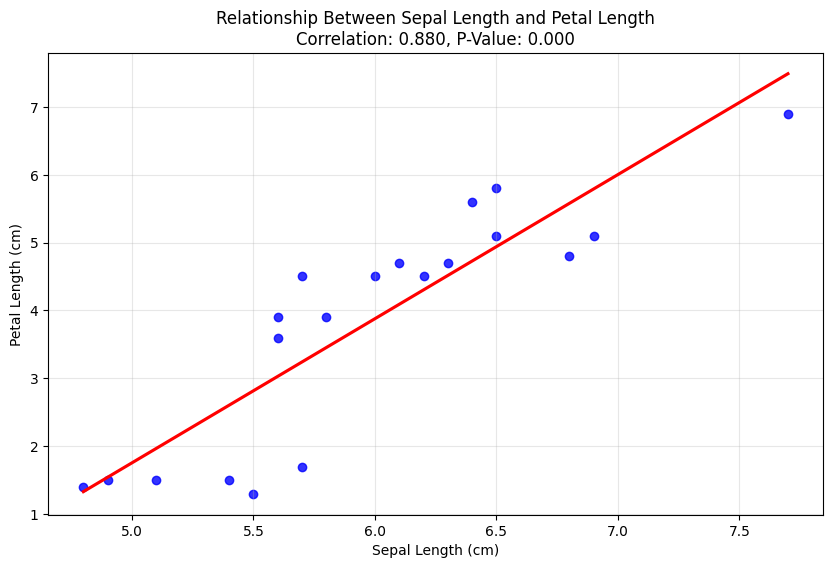

In [ ]:

import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm
import matplotlib.pyplot as plt


iris = sns.load_dataset('iris')

iris_subset = iris.sample(n=20, random_state=42)

sepal_length = iris_subset['sepal_length']
petal_length = iris_subset['petal_length']


correlation, p_value = pearsonr(sepal_length, petal_length)


X = sm.add_constant(sepal_length)
model = sm.OLS(petal_length, X).fit()

plt.figure(figsize=(10, 6))
sns.regplot(x=sepal_length, y=petal_length, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f"Relationship Between Sepal Length and Petal Length\nCorrelation: {correlation:.3f}, P-Value: {p_value:.3f}")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.grid(alpha=0.3)
plt.show()
